# 2 Body problem numerical solver 
#### This code will numerically solve the 2 body differntiall equation with some given initall conditions

#### Importing the dependecies

In [33]:
import numpy as np 
from scipy.integrate import odeint
import pandas
import matplotlib.pyplot as plt
import math

In [29]:
# Earth Model
def model_2BP(state, t):
    mu = 3.986004418E+05  # Earth's gravitational parameter  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    x_ddot = -mu * x / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    y_ddot = -mu * y / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    z_ddot = -mu * z / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

In [30]:
# Initial Conditions
X_0 = -2500  # [km]
Y_0 = -5500  # [km]
Z_0 = 3400  # [km]
VX_0 = 7.5  # [km/s]
VY_0 = 0.0  # [km/s]
VZ_0 = 4.0  # [km/s]
state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]

# Time Array
t = np.linspace(0, 6*3600, 200)  # Simulates for a time period of 6
                                 # hours [s]

In [34]:
# Solving ODE
sol = odeint(model_2BP, state_0, t)
X_Sat = sol[:, 0]  # X-coord [km] of satellite over time interval 
Y_Sat = sol[:, 1]  # Y-coord [km] of satellite over time interval
Z_Sat = sol[:, 2]  # Z-coord [km] of satellite over time interval


In [ ]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)


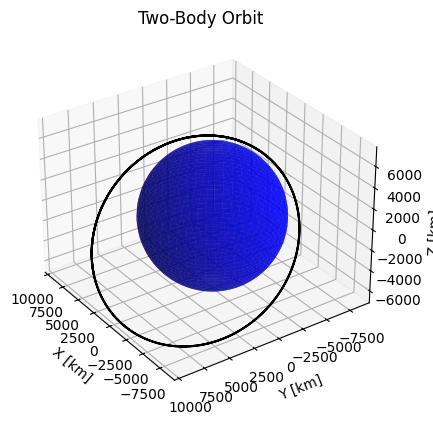

In [40]:
# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)
ax.plot3D(X_Sat, Y_Sat, Z_Sat, 'black')
ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')

# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),      
                   ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)
plt.show()


In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [43]:
# Time Array
t = np.linspace(0, 20, 100)

# Position Arrays
x = np.sin(np.pi/5 * t)
y = np.sin(np.pi/3 * t)
z = np.linspace(0, 100, 100)

# Setting up Data Set for Animation
dataSet = np.array([x, y, z])  # Combining our position coordinates
numDataPoints = len(t)

In [ ]:

    ax.set_zlabel('z')

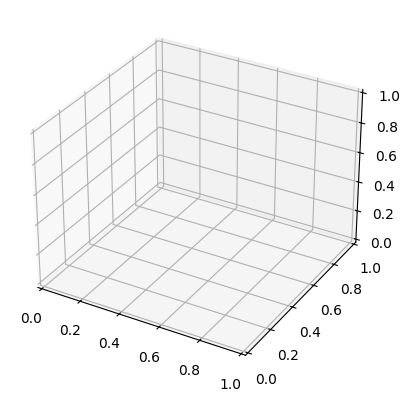

In [ ]:
# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                   frames=numDataPoints)
plt.show()

In [1]:
import numpy as np

In [3]:
a = np.array([1,2,3])
b = np.array([4,5,6])

np.hstack([a,b])

array([1, 2, 3, 4, 5, 6])